# DAT210x - Programming with Python for DS

## Module5- Lab1

Start by importing whatever you need to import in order to make this lab work:

In [25]:
# .. your code here ..
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from scipy import stats

### How to Get The Dataset

1. Open up the City of Chicago's [Open Data | Crimes](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2) page.
1. In the `Primary Type` column, click on the `Menu` button next to the info button, and select `Filter This Column`. It might take a second for the filter option to show up, since it has to load the entire list first.
1. Scroll down to `GAMBLING`
1. Click the light blue `Export` button next to the `Filter` button, and select `Download As CSV`

Now that you have th dataset stored as a CSV, load it up being careful to double check headers, as per usual:

In [2]:
# .. your code here ..
#Uploaded the 2018 crime scene dataset file since the 2001 to present dataset file is too large
df = pd.read_csv('Datasets/Crimes_-_2018.csv')

Get rid of any _rows_ that have nans in them:

In [3]:
# .. your code here ..
df.dropna(axis = 0, how = 'any', inplace = True)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
11,24059,JB350418,07/15/2018 07:45:00 AM,009XX N KEDVALE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,37.0,23.0,01A,1148545.0,1905987.0,2018,04/06/2019 03:57:03 PM,41.897967,-87.729856,"(41.89796724, -87.729855801)"
13,11535633,JB553685,12/14/2018 08:06:00 PM,006XX E 103RD ST,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,STREET,False,False,...,9.0,50.0,11,1182674.0,1836816.0,2018,04/06/2019 03:57:03 PM,41.707429,-87.606652,"(41.707429221, -87.60665223)"
14,11521050,JB534187,11/30/2018 05:48:00 AM,025XX W PETERSON AVE,0620,BURGLARY,UNLAWFUL ENTRY,CONVENIENCE STORE,True,False,...,40.0,2.0,05,1158400.0,1939772.0,2018,04/06/2019 03:57:03 PM,41.990479,-87.692732,"(41.990479499, -87.692731805)"
17,11485534,JB486985,10/22/2018 05:45:00 PM,008XX W 78TH ST,1565,SEX OFFENSE,INDECENT SOLICITATION/CHILD,APARTMENT,True,False,...,17.0,71.0,17,1171858.0,1853128.0,2018,04/06/2019 03:57:03 PM,41.752435,-87.645783,"(41.752435273, -87.645783303)"
44,24095,JB372197,07/30/2018 10:27:00 PM,047XX S FORRESTVILLE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,3.0,38.0,01A,1180724.0,1873803.0,2018,04/05/2019 03:59:08 PM,41.808970,-87.612658,"(41.808970443, -87.612658422)"


Display the `dtypes` of your dset:

In [4]:
# .. your code here ..
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

Coerce the `Date` feature (which is currently a string object) into real date, and confirm by displaying the `dtypes` again. This might be a slow executing process...

In [5]:
# .. your code here ..
df.Date = pd.to_datetime(df['Date'])
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

In [22]:
def doKMeans(df):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)

    
    # TODO: Filter `df` using indexing so it only contains Longitude and Latitude,
    # since the remaining columns aren't really applicable for this lab:
    #
    # .. your code here ..
    df1 = pd.concat([df.Longitude, df.Latitude], axis = 1)

    # TODO: Use K-Means to try and find seven cluster centers in this df.
    # Be sure to name your kmeans model `model` so that the printing works.
    #
    # .. your code here ..
    model = KMeans(n_clusters = 7)
    model.fit_predict(df1)

    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
    return centroids

[[-87.68446653  41.78023951]
 [-87.72445114  41.88174136]
 [-87.63964812  41.88259013]
 [-87.68003299  41.96591888]
 [-87.63350761  41.70135758]
 [-87.78079021  41.94748137]
 [-87.59512886  41.76458513]]


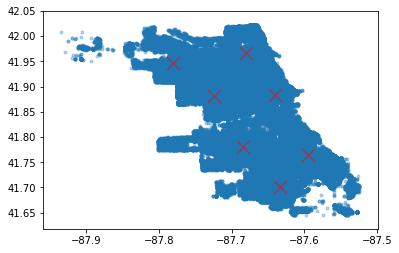

In [23]:
# Print & Plot your data
kmean1 = doKMeans(df)


In [27]:
#Displaying some statistical facts of the centroid location kmean1
stats.describe(kmean1)

DescribeResult(nobs=7, minmax=(array([-87.78079021,  41.70135758]), array([-87.59512886,  41.96591888])), mean=array([-87.67686078,  41.84627342]), variance=array([0.00384641, 0.0098615 ]), skewness=array([-0.41643986, -0.19015727]), kurtosis=array([-0.74109321, -1.36499455]))

Filter out the data so that it only contains samples that have a `Date > '2011-01-01'`, using indexing. Then, in a new figure, plot the crime incidents, as well as a new K-Means run's centroids.

In [28]:
# .. your code here ..
#Since I have have the data in 2018. Filter out the data after 2018-07-01
df2 = df[df['Date'] > '2018-07-01']

[[-87.72403151  41.88140533]
 [-87.59471852  41.76413043]
 [-87.6790019   41.96633318]
 [-87.68384853  41.77990141]
 [-87.77887973  41.94626388]
 [-87.64003288  41.88308449]
 [-87.63297454  41.70103205]]


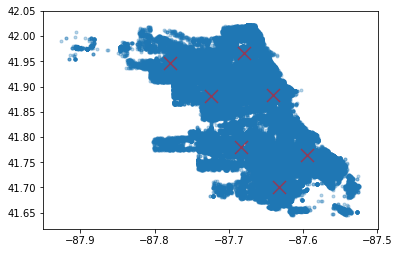

In [29]:
# Print & Plot your data
kmean2 = doKMeans(df2)

In [30]:
#Displaying some statistical facts of the centroid location kmean2
stats.describe(kmean2)

DescribeResult(nobs=7, minmax=(array([-87.77887973,  41.70103205]), array([-87.59471852,  41.96633318])), mean=array([-87.67621252,  41.84602154]), variance=array([0.00378551, 0.00987485]), skewness=array([-0.40390268, -0.19119672]), kurtosis=array([-0.75229341, -1.36496664]))

In [ ]:
#Question
#Did your centroid locations change after you limited the date range to +2011?
#Answer: The centroid location did not change much by comparing the means of kmean1 and kmean2
